In [1]:
import numpy as np 
import pandas as pd 
import nltk
import os
import gc
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_colwidth', -1)

In [2]:
gc.collect()

22

In [3]:
os.chdir("A:\DATA\Imartics\MLP05")

In [4]:
movietrain=pd.read_csv("train.tsv",sep="\t")

In [5]:
movietrain.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
from pandas_profiling import ProfileReport
dfp=ProfileReport(movietrain,title="Adult")
dfp.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


In [7]:
movietrain.dtypes

PhraseId      int64 
SentenceId    int64 
Phrase        object
Sentiment     int64 
dtype: object

In [8]:
print(movietrain.shape)

(156060, 4)


In [9]:
movietrain.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [10]:
movietest=pd.read_csv("test.tsv",sep="\t")

In [11]:
print(movietrain.shape)

(156060, 4)


In [12]:
movietest['Sentiment']=-999
movietest.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine effort .,-999
1,156062,8545,An intermittently pleasing but mostly routine effort,-999
2,156063,8545,An,-999
3,156064,8545,intermittently pleasing but mostly routine effort,-999
4,156065,8545,intermittently pleasing but mostly routine,-999


In [13]:
moviereview=pd.concat([movietrain,movietest],ignore_index=True)
print(moviereview.shape)

(222352, 4)


In [14]:
moviereview.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [15]:
moviereview.tail()

,PhraseId,SentenceId,Phrase,Sentiment
222347,222348,11855,"A long-winded , predictable scenario .",-999
222348,222349,11855,"A long-winded , predictable scenario",-999
222349,222350,11855,"A long-winded ,",-999
222350,222351,11855,A long-winded,-999
222351,222352,11855,predictable scenario,-999


In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mithr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mithr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re

In [18]:
def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        #review=[stemmer.stem(w) for w in word_tokenize(str(review).lower())]
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [19]:
moviereview['clean_review']=clean_review(moviereview.Phrase.values)

In [20]:
moviereview.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_review
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,a series of escapade demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amount to much of a story
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,a series of escapade demonstrating the adage that what is good for the goose
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [21]:
moviereviewtrain=moviereview[moviereview.Sentiment!=-999]
moviereviewtest=moviereview[moviereview.Sentiment==-999]

In [22]:
moviereviewtest.drop('Sentiment',axis=1,inplace=True)

In [23]:
moviereviewtrain.shape,moviereviewtest.shape

((156060, 5), (66292, 4))

In [24]:
#phrase
movieReviewTrainText=moviereviewtrain.clean_review.values
movieReviewTestText=moviereviewtest.clean_review.values
target=moviereviewtrain.Sentiment.values


In [25]:
target

array([1, 2, 2, ..., 3, 2, 2], dtype=int64)

In [26]:
y=to_categorical(target)

In [27]:
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [28]:
X_train_text,X_val_text,y_train,y_val=train_test_split(movieReviewTrainText,y,test_size=0.2,
                                                       stratify=y,random_state=123)
print(X_train_text.shape,y_train.shape)
print(X_val_text.shape,y_val.shape)

(124848,) (124848, 5)
(31212,) (31212, 5)


In [29]:
all_words=' '.join(X_train_text)
all_words=word_tokenize(all_words)
dist=FreqDist(all_words)
num_unique_word=len(dist)
num_unique_word

13732

In [30]:
r_len=[] 
for text in X_train_text:
    word=word_tokenize(text)
    l=len(word)
    r_len.append(l) 
    
MAX_REVIEW_LEN=np.max(r_len)
MAX_REVIEW_LEN

48

In [31]:
r_len

[11,
 1,
 3,
 2,
 2,
 1,
 4,
 13,
 2,
 14,
 1,
 2,
 18,
 2,
 8,
 4,
 16,
 13,
 3,
 11,
 17,
 3,
 5,
 7,
 5,
 6,
 14,
 4,
 2,
 1,
 2,
 24,
 3,
 10,
 11,
 3,
 22,
 3,
 6,
 3,
 13,
 4,
 14,
 1,
 4,
 12,
 1,
 1,
 2,
 9,
 10,
 15,
 5,
 5,
 18,
 6,
 19,
 2,
 7,
 6,
 19,
 16,
 1,
 3,
 2,
 5,
 2,
 11,
 11,
 2,
 7,
 5,
 1,
 2,
 5,
 2,
 9,
 9,
 3,
 5,
 1,
 5,
 2,
 5,
 6,
 3,
 3,
 6,
 14,
 20,
 9,
 17,
 8,
 4,
 5,
 23,
 2,
 1,
 3,
 6,
 3,
 13,
 25,
 2,
 1,
 3,
 2,
 3,
 3,
 3,
 10,
 1,
 2,
 21,
 8,
 21,
 11,
 10,
 2,
 26,
 1,
 3,
 1,
 2,
 16,
 8,
 3,
 3,
 20,
 12,
 3,
 4,
 4,
 19,
 2,
 4,
 19,
 1,
 2,
 9,
 10,
 5,
 2,
 7,
 5,
 12,
 5,
 2,
 2,
 20,
 5,
 8,
 7,
 4,
 1,
 8,
 6,
 7,
 4,
 16,
 2,
 3,
 19,
 6,
 3,
 12,
 2,
 12,
 1,
 1,
 2,
 6,
 4,
 15,
 11,
 2,
 3,
 3,
 6,
 3,
 2,
 5,
 20,
 11,
 3,
 4,
 2,
 3,
 4,
 6,
 4,
 2,
 7,
 1,
 2,
 19,
 2,
 5,
 2,
 8,
 9,
 7,
 3,
 2,
 3,
 8,
 1,
 1,
 3,
 2,
 18,
 14,
 20,
 26,
 5,
 6,
 14,
 2,
 18,
 4,
 7,
 2,
 2,
 10,
 7,
 5,
 2,
 8,
 3,
 6,
 3,
 16,
 7,
 3,
 4,

In [32]:
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 128
epochs = 3
num_classes=5

In [33]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train_text))
X_train = tokenizer.texts_to_sequences(X_train_text)
X_val = tokenizer.texts_to_sequences(X_val_text)
X_test = tokenizer.texts_to_sequences(movieReviewTestText)

In [34]:
type(X_train)

list

In [35]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_val.shape,X_test.shape)

(124848, 48) (31212, 48) (66292, 48)


In [36]:
model1=Sequential()
model1.add(Embedding(max_features,100,mask_zero=True))
model1.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model1.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model1.add(Dense(num_classes,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1373200   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 1,428,021
Trainable params: 1,428,021
Non-trainable params: 0
_________________________________________________________________


In [37]:
%%time
history1=model1.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
976/976 [==============================] - 147s 151ms/step - loss: 1.0681 - accuracy: 0.5821 - val_loss: 0.8686 - val_accuracy: 0.6473
Epoch 2/3
976/976 [==============================] - 151s 155ms/step - loss: 0.8240 - accuracy: 0.6649 - val_loss: 0.8275 - val_accuracy: 0.6641
Epoch 3/3
976/976 [==============================] - 154s 157ms/step - loss: 0.7652 - accuracy: 0.6863 - val_loss: 0.8184 - val_accuracy: 0.6678
Wall time: 7min 40s


In [38]:
y_pred1=model1.predict_classes(X_test,verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
2072/2072 [==============================] - 18s 9ms/step


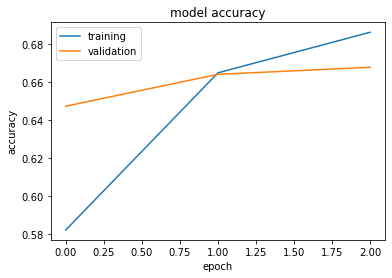

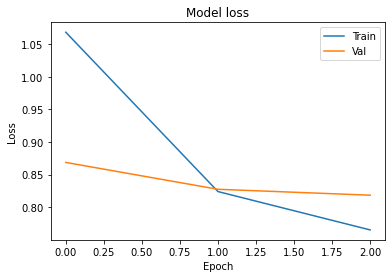

In [39]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [40]:
model2= Sequential()
model2.add(Embedding(max_features,100,input_length=max_words))
model2.add(Dropout(0.2))

model2.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model2.add(GlobalMaxPooling1D())

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(num_classes,activation='softmax'))


model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 48, 100)           1373200   
_________________________________________________________________
dropout (Dropout)            (None, 48, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 48, 64)            19264     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [41]:
%%time
history2=model2.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
976/976 [==============================] - 36s 37ms/step - loss: 1.0114 - accuracy: 0.5957 - val_loss: 0.8513 - val_accuracy: 0.6550
Epoch 2/3
976/976 [==============================] - 33s 34ms/step - loss: 0.7850 - accuracy: 0.6778 - val_loss: 0.8064 - val_accuracy: 0.6664
Epoch 3/3
976/976 [==============================] - 33s 34ms/step - loss: 0.7033 - accuracy: 0.7095 - val_loss: 0.7992 - val_accuracy: 0.6686
Wall time: 1min 42s


In [42]:
y_pred2=model2.predict_classes(X_test, verbose=1)

2072/2072 [==============================] - 4s 2ms/step


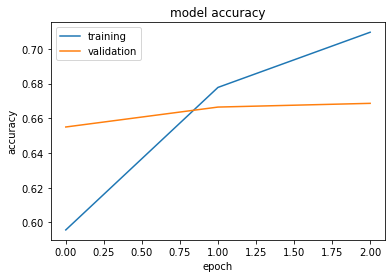

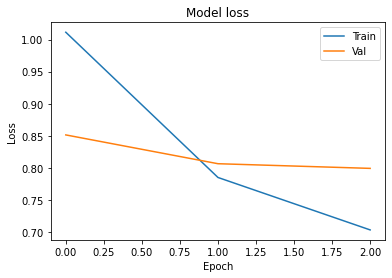

In [43]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [44]:
model3= Sequential()
model3.add(Embedding(max_features,100,input_length=max_words))
model3.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Dropout(0.25))
model3.add(GRU(128,return_sequences=True))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(5,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 48, 100)           1373200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 64)            19264     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 64)            0         
_________________________________________________________________
gru (GRU)                    (None, 24, 128)           74496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)             

In [45]:
%%time
history3=model3.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
976/976 [==============================] - 76s 78ms/step - loss: 1.0105 - accuracy: 0.5976 - val_loss: 0.8686 - val_accuracy: 0.6474
Epoch 2/3
976/976 [==============================] - 69s 70ms/step - loss: 0.8059 - accuracy: 0.6699 - val_loss: 0.8126 - val_accuracy: 0.6664
Epoch 3/3
976/976 [==============================] - 75s 77ms/step - loss: 0.7279 - accuracy: 0.6957 - val_loss: 0.8077 - val_accuracy: 0.6693
Wall time: 3min 42s


In [46]:
y_pred3=model3.predict_classes(X_test, verbose=1)

2072/2072 [==============================] - 12s 6ms/step


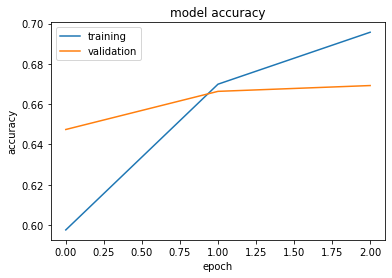

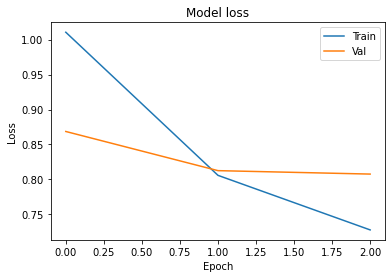

In [47]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()